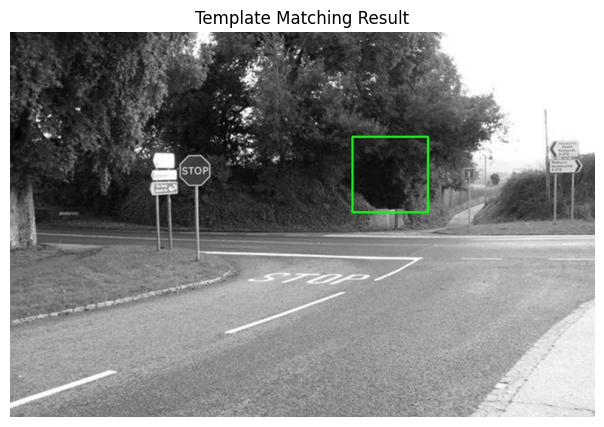

In [48]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

original_color = cv2.imread(r'data\Lab1\task4\original_image.jpg')  # Load as BGR by default
template_color = cv2.imread(r'data\Lab1\task4\template.png')        # Load as BGR by default

# Convert to grayscale
original = cv2.cvtColor(original_color, cv2.COLOR_BGR2GRAY)
template = cv2.cvtColor(template_color, cv2.COLOR_BGR2GRAY)  

#Template too big, scale it down
def scale_template(template,scale_factor):
    new_width = int(template.shape[1] * scale_factor)
    new_height = int(template.shape[0] * scale_factor)
    return cv2.resize(template, (new_width, new_height))

template = scale_template(template,0.1)
#Perform template matching
result = cv2.matchTemplate(original, template, cv2.TM_CCOEFF_NORMED)

#Location of the highest match
min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(result)

top_left = max_loc
h, w = template.shape


#Draw a rectangle around it
bottom_right = (top_left[0] + w, top_left[1] + h)
matched_image = cv2.cvtColor(original, cv2.COLOR_GRAY2BGR)
cv2.rectangle(matched_image, top_left, bottom_right, (0, 255, 0), 2)

plt.figure(figsize=(10, 5))
plt.imshow(matched_image, cmap='gray')
plt.title('Template Matching Result')
plt.axis('off')
plt.show()


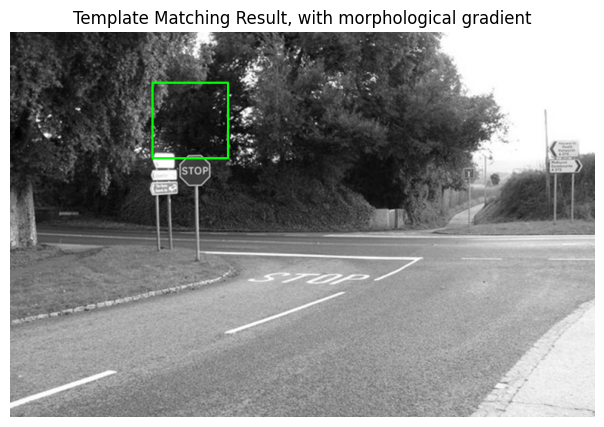

In [51]:
#Not very good... Lets try to morphologically change the picture 


# For example, using morphological gradient to emphasize edges
original_color = cv2.imread(r'data\Lab1\task4\original_image.jpg')  # Load as BGR by default
template_color = cv2.imread(r'data\Lab1\task4\template.png')        # Load as BGR by default

# Convert to grayscale
original = cv2.cvtColor(original_color, cv2.COLOR_BGR2GRAY)
template = cv2.cvtColor(template_color, cv2.COLOR_BGR2GRAY)   

template = scale_template(template,0.1)
kernel = np.ones((5, 5), np.uint8)

# Apply Morphological Gradient to both images
original_gradient = cv2.morphologyEx(original, cv2.MORPH_GRADIENT, kernel)
template_gradient = cv2.morphologyEx(template, cv2.MORPH_GRADIENT, kernel)

#Perform template matching
result_morph = cv2.matchTemplate(original_gradient, template_gradient, cv2.TM_CCOEFF_NORMED)

#Location of the highest match
min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(result_morph)

top_left = max_loc
h, w = template.shape

bottom_right = (top_left[0] + w, top_left[1] + h)
matched_image = cv2.cvtColor(original, cv2.COLOR_GRAY2BGR)
cv2.rectangle(matched_image, top_left, bottom_right, (0, 255, 0), 2)

plt.figure(figsize=(10, 5))
plt.imshow(matched_image, cmap='gray')
plt.title('Template Matching Result, with morphological gradient')
plt.axis('off')
plt.show()

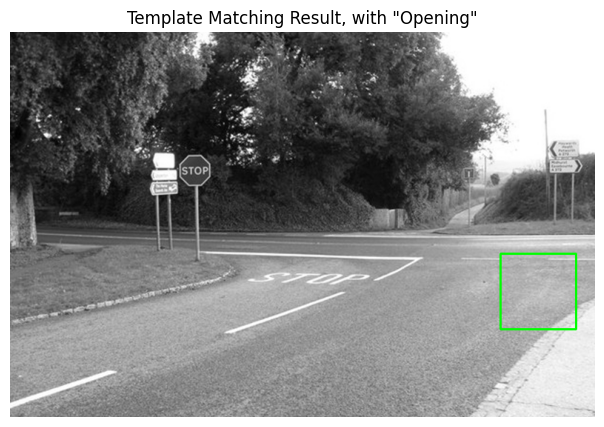

In [56]:
#Or using Opening (erosion followed by dilation)
original_color = cv2.imread(r'data\Lab1\task4\original_image.jpg')  # Load as BGR by default
template_color = cv2.imread(r'data\Lab1\task4\template.png')        # Load as BGR by default

# Convert to grayscale
original = cv2.cvtColor(original_color, cv2.COLOR_BGR2GRAY)
template = cv2.cvtColor(template_color, cv2.COLOR_BGR2GRAY)   

template = scale_template(template,0.1)
kernel = np.ones((5, 5), np.uint8)

# Apply Opening (erosion followed by dilation) 
original_opened = cv2.morphologyEx(original, cv2.MORPH_OPEN, kernel)
template_opened = cv2.morphologyEx(template, cv2.MORPH_OPEN, kernel)

#Perform template matching
result_morph = cv2.matchTemplate(original_opened, template_opened, cv2.TM_CCOEFF_NORMED)

#Location of the highest match
min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(result_morph)

top_left = max_loc
h, w = template.shape

bottom_right = (top_left[0] + w, top_left[1] + h)
matched_image = cv2.cvtColor(original, cv2.COLOR_GRAY2BGR)
cv2.rectangle(matched_image, top_left, bottom_right, (0, 255, 0), 2)

plt.figure(figsize=(10, 5))
plt.imshow(matched_image, cmap='gray')
plt.title('Template Matching Result, with "Opening"')
plt.axis('off')
plt.show()

In [57]:
#Conclusion: The Morphological gradient produces the best results, and opening produces worse results than without any morphological operation.